In [ ]:
# 벅스 뮤직 크롤링_아티스트 분석
'https://music.bugs.co.kr/chart/track/day/total?chartdate=20220322'

In [ ]:
# 벅스 뮤직 일간 차트 자료 
# - 일자별 차트 크롤링 (시작일 ~ 종료일) 차트 내용 가져오기
# - 기간 내 가장 많이 등장한 아티스트, 곡 제목 확인하기 + 시각화
# - 특정 곡에 대한 순위 변동 확인 및 시각화

In [1]:
import requests # 필요한 모듈 연결할 거다 이 말이야
from bs4 import BeautifulSoup as bs
import pandas as pd

In [2]:
url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=' + str(20220404)
html = requests.get(url)
soup=bs(html.text,'html.parser')

bugs_day = []
tbody=soup.find('tbody') # 표의 바디 찾는  부분
tr_soup=tbody.find_all('tr')
rank=tr_soup[0].find('div',class_="ranking").get_text().split("\n")[1] # 음원차트 랭킹 숫자만 가져오는 거
title=tr_soup[0].find('p',class_="title").get_text().replace('\n',"") # 제목 추출
art=tr_soup[0].find('p',class_="artist").get_text().replace('\n',"") # 아티스트 추출
album=tr_soup[0].find('a',class_="album").get_text().replace('\n',"") # 앨범 명

bugs_day.append([rank,title,art,album])
bugs_day

[['1', '봄여름가을겨울 (Still Life)', 'BIGBANG (빅뱅)', '봄여름가을겨울 (Still Life)']]

In [3]:
# 전체 순위 가져오기
url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=' + str(20220404)
html = requests.get(url)
soup=bs(html.text,'html.parser')

bugs_day = []
tbody=soup.find('tbody')
tr_soup=tbody.find_all('tr')
for tr in tr_soup:
    rank=tr.find('div',class_="ranking").get_text().split("\n")[1] # 음원차트 랭킹 숫자만 가져오는 거
    title=tr.find('p',class_="title").get_text().replace('\n',"") # 제목 추출
    art=tr.find('p',class_="artist").get_text().replace('\n',"") # 아티스트 추출
    album=tr.find('a',class_="album").get_text().replace('\n',"") # 앨범 명

    bugs_day.append([rank,title,art,album])

# DataFrame으로 가공하기
df = pd.DataFrame(bugs_day,columns =['순위','곡명','아티스트','앨범명'])
df


,순위,곡명,아티스트,앨범명
0,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life)
1,2,TOMBOY,(여자)아이들,I NEVER DIE
2,3,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
3,4,GANADARA (Feat. 아이유),박재범,GANADARA
4,5,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙)
...,...,...,...,...
95,96,Decanting,수호 (SUHO),Grey Suit - The 2nd Mini Album
96,97,75분의 1초 (Moment),수호 (SUHO),Grey Suit - The 2nd Mini Album
97,98,내가 아니라도,주호,내가 아니라도
98,99,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식(Basick),쇼미더머니 10 Episode 3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    object
 1   곡명      100 non-null    object
 2   아티스트    100 non-null    object
 3   앨범명     100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [5]:
# 순위에 따른 점수 부여하기
# 1등은 100점 ... 100등은 1점
score = []
for i in range(100):
    score.append(101-int(df.loc[i,'순위']))

df['점수'] = score
df

,순위,곡명,아티스트,앨범명,점수
0,1,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),봄여름가을겨울 (Still Life),100
1,2,TOMBOY,(여자)아이들,I NEVER DIE,99
2,3,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’,98
3,4,GANADARA (Feat. 아이유),박재범,GANADARA,97
4,5,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙),96
...,...,...,...,...,...
95,96,Decanting,수호 (SUHO),Grey Suit - The 2nd Mini Album,5
96,97,75분의 1초 (Moment),수호 (SUHO),Grey Suit - The 2nd Mini Album,4
97,98,내가 아니라도,주호,내가 아니라도,3
98,99,만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL),베이식(Basick),쇼미더머니 10 Episode 3,2


In [88]:
### 특정기간을 입력하면 해당 기간의 순위를 크롤링 하기
# - 시작일 / 종료일은 사용자로부터 입력 받기
# - 기간 전체 순위 가져오기 (2022.02.01 ~ 2022.03.23)
# - 가져온 데이터는 DataFrame으로 변환
#!pip install tqdm

In [6]:
# 시작일, 종료일 생성 함수
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import tqdm # 로딩되고 있는지 확인하게 해주는 모듈

std=input('시작일 입력: ')
etd=input('종료일 입력: ')
dates = pd.date_range(std, etd)
dates=[i.strftime('%Y%m%d')for i in dates]
#print(dates)

df_bugs = pd.DataFrame() # 각 일자의 데이터베이스를 합칠 빈 데이터베이스

for date in tqdm(dates): # 입력한 기간 내의 차트 별 url 받아오는 구문
    url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=' +str(date)
    
    html = requests.get(url) 
    soup=bs(html.text,'html.parser')
    
    bugs_day = [] # 각 날짜의 곡 순위 정보 담을 빈 리스트
    tbody=soup.find('tbody')
    tr_soup=tbody.find_all('tr')
    scr=101 # 점수의 초기값을 설정
    
    for tr in tr_soup: # 각 차트의 순위 정보 가져오는 구문
        rank=tr.find('div',class_="ranking").get_text().split("\n")[1] # 음원차트 랭킹 숫자만 가져오는 거
        title=tr.find('p',class_="title").get_text().replace('\n',"") # 제목 추출
        art=tr.find('p',class_="artist").get_text().replace('\n',"") # 아티스트 추출
        album=tr.find('a',class_="album").get_text().replace('\n',"") # 앨범 명
        scr -= 1 # 1회 추출할 때마다 -1씩 scr의 수치가 감소
        bugs_day.append([date,rank,title,art,album,scr])

# DataFrame으로 가공하기
    df = pd.DataFrame(bugs_day,columns =['날짜','순위','곡명','아티스트','앨범명','점수'])
    # df는 각 일자의 곡 순위 정보를 담은 일일 데이터 프레임
    df_bugs = pd.concat([df_bugs,df]) # 각 일자의 데이터프레임을 합치는 과정
    
df_bugs.reset_index(drop=True, inplace =True) # 데이터프레임의 인덱스 값 초기화
df_bugs.info()

시작일 입력: 20220301
종료일 입력: 20220404


100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:33<00:00,  1.04it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      3500 non-null   object
 1   순위      3500 non-null   object
 2   곡명      3500 non-null   object
 3   아티스트    3500 non-null   object
 4   앨범명     3500 non-null   object
 5   점수      3500 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 164.2+ KB


In [7]:
df_bugs[df_bugs['순위']=='1'].head()

,날짜,순위,곡명,아티스트,앨범명,점수
0,20220301,1,어제처럼,폴킴(Paul Kim),어제처럼,100
100,20220302,1,듣고 싶을까,MSG워너비(M.O.M),듣고 싶을까,100
200,20220303,1,듣고 싶을까,MSG워너비(M.O.M),듣고 싶을까,100
300,20220304,1,듣고 싶을까,MSG워너비(M.O.M),듣고 싶을까,100
400,20220305,1,듣고 싶을까,MSG워너비(M.O.M),듣고 싶을까,100


In [8]:
df_bugs.groupby('아티스트')[['곡명']].count()

,곡명
아티스트,
(여자)아이들,99
10CM,35
2am,2
AKMU(악뮤),52
Alan Walker(알렌 워커)\rAlan Walker(알렌 워커)\r,1
...,...
하현우(국카스텐),2
한동근,9
해찬 (HAECHAN),4


In [9]:
df_at=df_bugs.groupby('아티스트')[['곡명']].count()
dfat_10=df_at.sort_values('곡명',ascending=False).head(10)
dfat_10=dfat_10.reset_index()
dfat_10

,아티스트,곡명
0,아이유(IU),212
1,태연 (TAEYEON),193
2,aespa,109
3,BE'O (비오),105
4,방탄소년단,105
5,(여자)아이들,99
6,Red Velvet (레드벨벳),91
7,이무진,74
8,MSG워너비(M.O.M),70
9,폴킴(Paul Kim),69


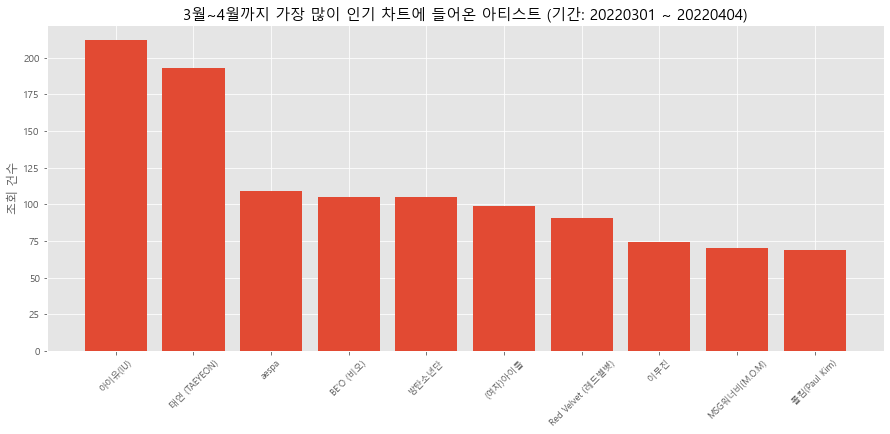

In [11]:
#위의 데이터프레임을 차트로 나타내기 
# 특정 기간 내 100위 권 안에 가장 많이 진입한 아티스트 현황 파악
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin':# 맥
    plt.rc('font', family='AppleGothic')

elif platform.system() == 'Windows': #windows
    plt.rc('font', family='Malgun Gothic')

elif platform.system() == 'Linux': #linux
    plt.rc('font', family='AppleGothic')

plt.style.use('ggplot')
plt.figure(figsize=(15,6))
plt.xticks(size=9, rotation=45)
plt.bar(dfat_10['아티스트'],dfat_10['곡명'])
plt.title(f'3월~4월까지 가장 많이 인기 차트에 들어온 아티스트 (기간: {std} ~ {etd})'
         ,size = 15)
plt.ylabel('조회 건수')
plt.show()

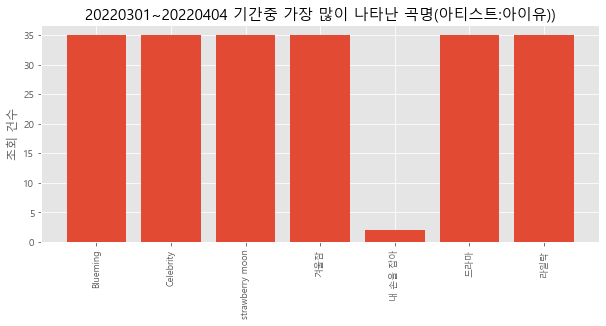

In [12]:
#### 가장 많이 나타난 아티스트의 노래 건 수는?
df_ty=df_bugs[df_bugs['아티스트']=="아이유(IU)"]
df_tit=df_ty.groupby("곡명")[["아티스트"]].count()

plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.xticks(size=9, rotation=90)

plt.bar(df_tit.index, df_tit.아티스트)

plt.title(f"{std}~{etd} 기간중 가장 많이 나타난 곡명(아티스트:아이유))", size=15)
plt.ylabel("조회 건수")
plt.show()

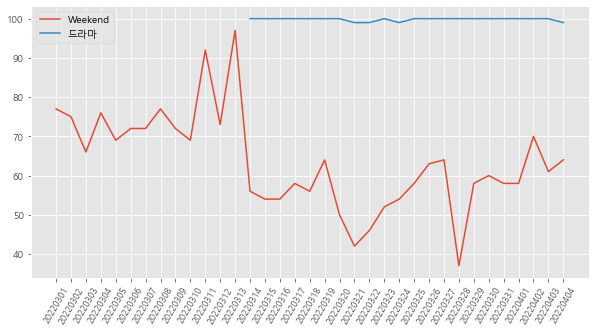

In [13]:
df_wk=df_bugs[df_bugs['곡명'] == 'Weekend']
df_idle=df_bugs[df_bugs['곡명'] == 'TOMBOY']

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.xticks(size=9, rotation=60)
plt.plot(df_wk.날짜, df_wk.점수,label = 'Weekend')
plt.plot(df_idle.날짜, df_idle.점수,label = '드라마')

plt.legend()

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

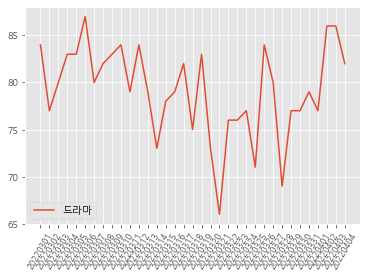

 14%|████████████                                                                        | 1/7 [00:00<00:04,  1.45it/s]

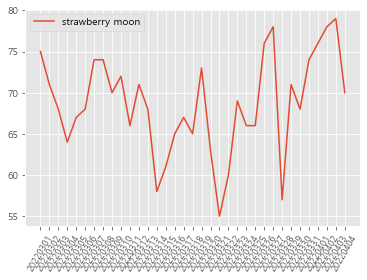

 29%|████████████████████████                                                            | 2/7 [00:01<00:04,  1.25it/s]

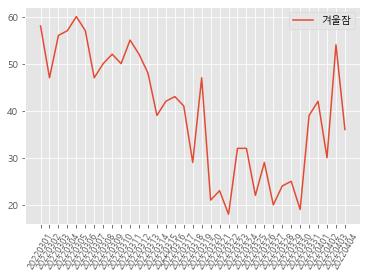

 43%|████████████████████████████████████                                                | 3/7 [00:02<00:02,  1.34it/s]

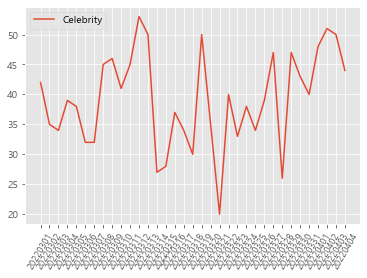

 57%|████████████████████████████████████████████████                                    | 4/7 [00:03<00:02,  1.27it/s]

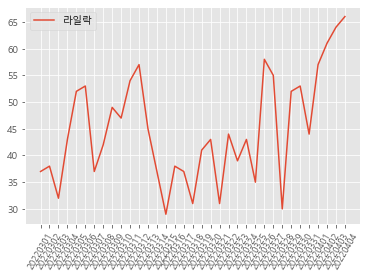

 71%|████████████████████████████████████████████████████████████                        | 5/7 [00:03<00:01,  1.29it/s]

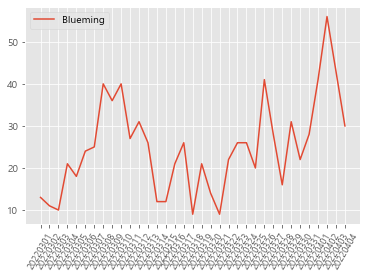

 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [00:04<00:00,  1.17it/s]

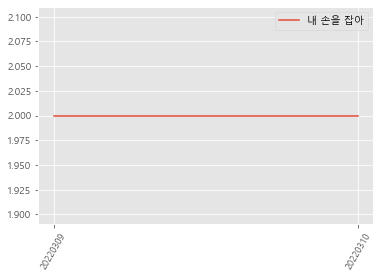

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.30it/s]


In [14]:
# 아이유의 곡들에 대한 일자별 변화 순위 변화 차트
# - 곡 하나 당 차트 하나
# - 차트 하나에 모든 곡 표현하기
df_iu=df_bugs[df_bugs['아티스트']=="아이유(IU)"]
df_tt=df_iu.groupby("곡명")[["아티스트"]].count()
# df_iu['곡명'].unique()  특정 열에서 고유 값 찾아오기

for tit in tqdm(df_iu['곡명'].unique()): # 벅스 df에서 아이유 곡 개수 만큼 그래프 그리기
    df_title=df_bugs[df_bugs['곡명']==tit]  # 벅스 df에서 iu 곡만 추출해오기
    plt.style.use('ggplot') 
    plt.xticks(size=9, rotation=60)
    plt.plot(df_title.날짜,df_title.점수, label=tit)
    plt.legend()
    plt.show()
    


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.13it/s]


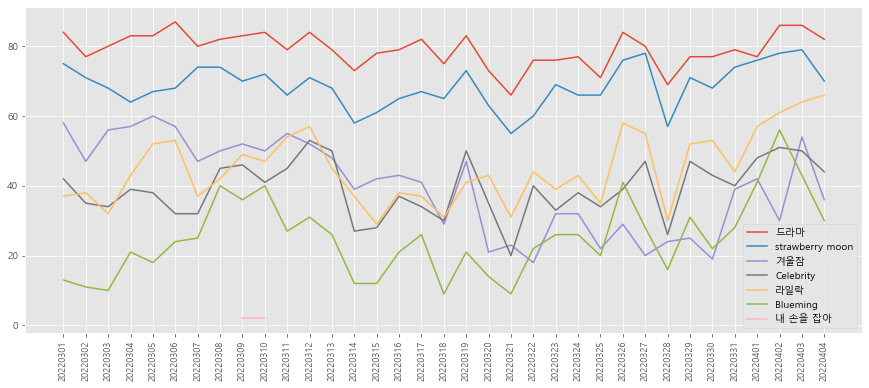

In [15]:
plt.style.use('ggplot')

plt.figure(figsize=(15, 6))
plt.xticks(size=9, rotation=90)

for tit in tqdm(df_iu["곡명"].unique()):
    df_title=df_bugs[df_bugs['곡명']==tit]
    plt.plot(df_title.날짜, df_title.점수, label=tit)

plt.legend()
plt.show()

In [87]:
#df_bugs.to_csv('./bugs_20220223_20220323', encoding ='UTF-8', index=False) # 만드거 csv로 저장하기

In [16]:
def startDate(): 
    #while 반복문을 이용하여 특정 조건을 만족할 때까지 계속 실행
    while True:
        # 데이터 입력 구간
        sDate = input('조회 시작일 입력')
        
        if len(sDate) != 8: #날짜가 10자리가 아니면 입력할 때까지 계속 실행
            print('"20220101"과 같은 형식으로 입력하세요')
            continue
        # - 를 뺀 나머지 입력 데이터가 모두 숫자인지 확인
        # 문자가 포함된 경우 다시 입력 받기
        try:
            sdt=int(sDate)
            break #sDate의 타입이 -를 제외했을 때 정수 형태면 while문을 멈춰라
        
        except:
            print('년,월,일 자리에 문자가 포함되어 있습니다.')
            continue #만약에 입력받은 데이터가 문자가 되어있는 경우 처음으로 돌아가기
    
    return sDate

In [17]:
def endDate():
    sDate=startDate() # 시작일 입력 받기
    
    # while문을 이용해 조건이 만족될때까지 계속 실행
    while True:
        # 데이터 입력
        eDate = input("종료일 입력:(예:20220101)")
        
        # 입력값이 10자리가 아닌경우 다시 입력 받기
        if len(eDate) != 8:
            print('"20220101"와 같이 8자리로 입력하세요.')
            continue
            
        # "-"를 뺀 나머지 입력 데이터가 모두 숫자인지 아닌지 확인
        # 문자 포함시 다시 입력받기
        # 입력한 종료일이 오늘 날짜인지 확인 => 오늘날짜-1 한 날짜로 세팅
        # 입력한 종료일이 시작일보다 큰거나 같은 값인지 확인 => 재입력
        try:
            edt = int(eDate)
            today = datetime.today()  # 현재 시스템 날짜 가져오기
            newDate=today.strftime('%Y%m%d') # 날짜형 => 문자형으로 변경

            # 입력데이터가 현재일보다 크거나 같은 데이터인지 확인
            if edt >= int(newDate):
                # 크거나 같다면 실행 전날로 종료일 변경
                eDate=(datetime.today()-timedelta(days=1)).strftime("%Y-%m-%d")
                print('데이터는 당일 이전 자료까지만 제공합니다.')

            if int(sDate) > edt:
                print('종료일이 시작일 보다 이전 날짜입니다.\n다시 입력해주세요:')
                continue

            break
            
        except:
            print("년, 월, 일 자리에 문자가 포함되어 있습니다.\n다시 입력하세요")
            continue
            
    return sDate, eDate

In [ ]:
sDate, eDate = endDate()
dates = pd.date_range(sDate, eDate)
dates=[i.strftime('%Y%m%d')for i in dates]
#print(dates)

df_bugs = pd.DataFrame() # 각 일자의 데이터베이스를 합칠 빈 데이터베이스

for date in tqdm(dates): # 입력한 기간 내의 차트 별 url 받아오는 구문
    url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=' +str(date)
    
    html = requests.get(url) 
    soup=bs(html.text,'html.parser')
    
    bugs_day = [] # 각 날짜의 곡 순위 정보 담을 빈 리스트
    tbody=soup.find('tbody')
    tr_soup=tbody.find_all('tr')
    scr=101 # 점수의 초기값을 설정
    
    for tr in tr_soup: # 각 차트의 순위 정보 가져오는 구문
        rank=tr.find('div',class_="ranking").get_text().split("\n")[1] # 음원차트 랭킹 숫자만 가져오는 거
        title=tr.find('p',class_="title").get_text().replace('\n',"") # 제목 추출
        art=tr.find('p',class_="artist").get_text().replace('\n',"") # 아티스트 추출
        album=tr.find('a',class_="album").get_text().replace('\n',"") # 앨범 명
        scr -= 1 # 1회 추출할 때마다 -1씩 scr의 수치가 감소
        bugs_day.append([date,rank,title,art,album,scr])

# DataFrame으로 가공하기
    df = pd.DataFrame(bugs_day,columns =['날짜','순위','곡명','아티스트','앨범명','점수'])
    # df는 각 일자의 곡 순위 정보를 담은 일일 데이터 프레임
    df_bugs = pd.concat([df_bugs,df]) # 각 일자의 데이터프레임을 합치는 과정
    
df_bugs.reset_index(drop=True, inplace =True) # 데이터프레임의 인덱스 값 초기화
df_bugs.info()

조회 시작일 입력20220301
종료일 입력:(예:20220101)20220404
년, 월, 일 자리에 문자가 포함되어 있습니다.
다시 입력하세요
종료일 입력:(예:20220101)20220301
년, 월, 일 자리에 문자가 포함되어 있습니다.
다시 입력하세요
